In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,precision_score,f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
%matplotlib inline




In [3]:
df1=pd.read_csv("./dataset.csv")
df1.head(30)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [4]:
df1.shape

(22000, 2)

In [5]:
df1.isnull().sum()

Text        0
language    0
dtype: int64

In [6]:
df1.language.value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [7]:
df1.isnull().sum()

Text        0
language    0
dtype: int64

In [8]:
df1.duplicated().sum()

141

In [9]:
df1.drop_duplicates(inplace=True)

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.Text.value_counts().sum(

)


21859

In [12]:
#cleaning of unwanted symbols from the data
def data_cleaner(Text):
    Text=re.sub(r'[\/`!@#$%^&*()_+{}<>,.?/":;0-9]',' ',Text)
    Text=Text.lower()
    return Text

In [13]:
data=df1.copy()
data["cleaned_data"]=""
data

,Text,language,cleaned_data
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,
4,de spons behoort tot het geslacht haliclona en...,Dutch,
...,...,...,...
21995,hors du terrain les années et sont des année...,French,
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,
21997,con motivo de la celebración del septuagésimoq...,Spanish,
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,


In [14]:
data["cleaned_data"]=data["Text"].apply(lambda x:data_cleaner(x))
data

,Text,language,cleaned_data
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuit...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
...,...,...,...
21995,hors du terrain les années et sont des année...,French,hors du terrain les années et sont des année...
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997,con motivo de la celebración del septuagésimoq...,Spanish,con motivo de la celebración del septuagésimoq...
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...


In [15]:
data.drop("Text",axis=1,inplace=True)

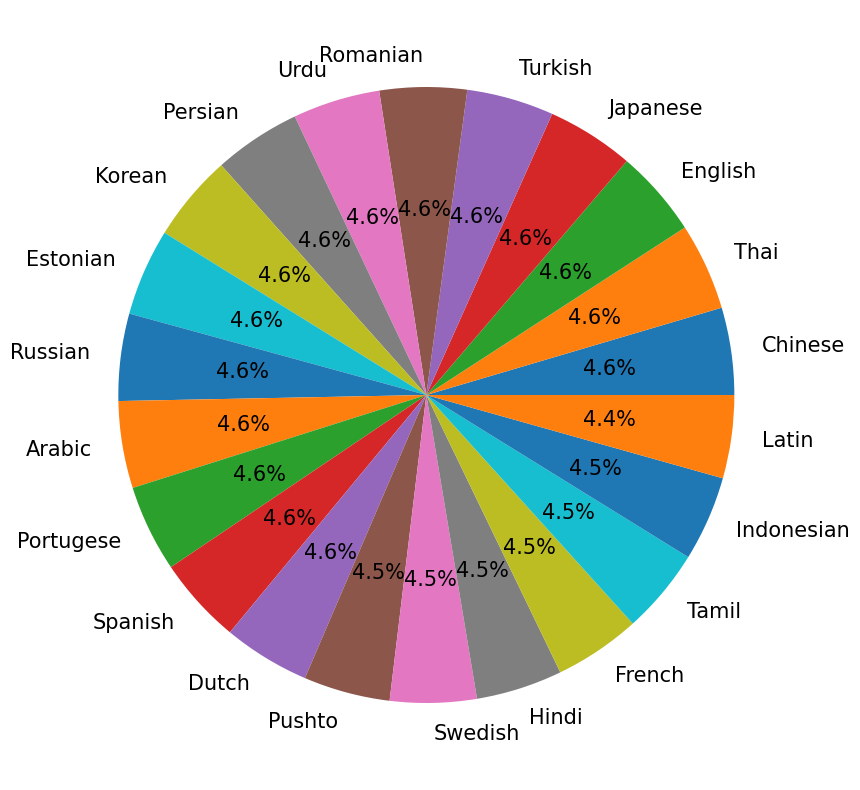

In [16]:
language=data["language"].value_counts().reset_index()
plt.figure(figsize=(10,10))
labels=language["index"]

plt.pie(language["language"],labels=labels,autopct='%.1f%%',textprops={'fontsize':15})
plt.show()

In [17]:
data

,language,cleaned_data
0,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,Swedish,sebes joseph pereira thomas på eng the jesuit...
2,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,Dutch,de spons behoort tot het geslacht haliclona en...
...,...,...
21995,French,hors du terrain les années et sont des année...
21996,Thai,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997,Spanish,con motivo de la celebración del septuagésimoq...
21998,Chinese,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...


In [18]:
x=data["cleaned_data"]
y=data["language"]

In [19]:
le=LabelEncoder()
y=le.fit_transform(y)





In [20]:
cv=CountVectorizer()
X=cv.fit_transform(x).toarray()

# X.shape

MemoryError: Unable to allocate 45.2 GiB for an array with shape (21859, 277720) and data type int64

In [ ]:
td_idf=TfidfVectorizer()
X1=td_idf.fit_transform(x).toarray()
X1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)


In [ ]:
model=MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
confusion_metrics=confusion_matrix(y_test,y_pred)
accuracy

0.9515096065873742

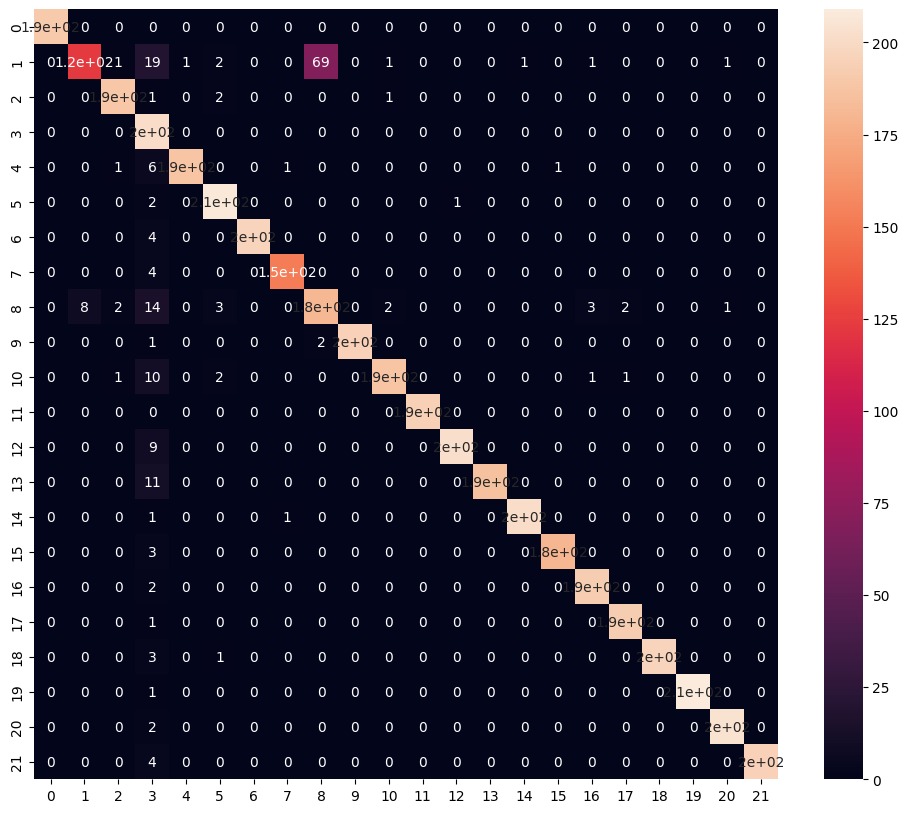

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_metrics,annot=True)
plt.show()

In [ ]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(model, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

In [ ]:
# Check overfit of the MultinomialNB model
# accuracy test and train
acc_test = model.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = model.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  95.15096065873742 %
The accuracy score of the training data is:  98.42 %


In [ ]:
y_pred=model.predict(X_test)


array([ 2,  6, 10, ..., 17, 14, 20], dtype=int64)

In [ ]:
def prediction(text):
    x=cv.transform([text]).toarray()
    lang=model.predict(x)
    lang=le.inverse_transform(lang)
    print("The langauge is",lang[0])

In [ ]:
prediction("This is the name of my school")
prediction("sebes joseph pereira thomas på eng the jesuit")
prediction("விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...	")
prediction("ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเl")
prediction("con motivo de la celebración del septuagésimoql")
prediction("當時還只有歲的她在美國出道，以mai-k名義推出首張英文")
prediction("hors du terrain les années et sont des année")
prediction("de spons behoort tot het geslacht haliclona en")
prediction("con motivo de la celebración del septuagésimoq.")
prediction("تتنىك نىنعهاعه زنتنا.")

    

The langauge is [3]
The langauge is [3]
The langauge is [18]
The langauge is [19]
The langauge is [16]
The langauge is [8]
The langauge is [5]
The langauge is [2]
The langauge is [16]
The langauge is [7]


In [ ]:


# from sklearn.pipeline import Pipeline

# from sklearn.ensemble import GradientBoostingClassifier
# classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2),MultinomialNB(),GradientBoostingClassifier(),AdaBoostClassifier()]

# for classifier in classifiers:
#     pipe = Pipeline(steps=[('classifier', classifier)])
#     pipe.fit(X_train, y_train)   
#     print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


In [ ]:
# # Check overfit of the KNN model
# # accuracy test and train
# acc_test = knn.score(X_test, y_test)
# print("The accuracy score of the test data is: ",acc_test*100,"%")
# acc_train = knn.score(X_train, y_train)
# print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

In [ ]:
# # KNN Model

# #initialize model
# knn = KNeighborsClassifier(n_neighbors = 2)

# #fit model
# knn.fit(X_train, y_train)

# # prediction = knn.predict(x_test)
# normalized_df_knn_pred = knn.predict(X_test)


# # check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
# acc = accuracy_score(y_test, normalized_df_knn_pred)
# print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# # f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
# f1 = f1_score(y_test, normalized_df_knn_pred)
# print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# # Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
# precision = precision_score(y_test, normalized_df_knn_pred)
# print(f"The precision score for KNN is: {round(precision,3)*100}%")

# # recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
# recall = recall_score(y_test, normalized_df_knn_pred)
# print(f"The recall score for KNN is: {round(recall,3)*100}%")

In [ ]:
# # Perform cross validation
# '''Cross Validation is used to assess the predictive performance of the models and and to judge 
# how they perform outside the sample to a new data set'''

# cv_results = cross_val_score(knn, X, y, cv=5) 

# print ("Cross-validated scores:", cv_results)
# print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

In [ ]:
# cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

# sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [ ]:
# print(classification_report(y_test,y_pred5))

In [ ]:
# print(knn.score(X_test,y_test))
# print(svc.score(X_test,y_test))
# print(lr.score(X_test,y_test))
# # print(gnb.score(X_test,y_test))
# print(rfc.score(X_test,y_test))
# print(dt.score(X_test,y_test))

0.5508264462809918
0.8946280991735537
0.9424242424242424
0.9199724517906336
0.8962809917355372


Fitting 3 folds for each of 17 candidates, totalling 51 fits


{'alpha': 1e-08}

0.953168044077135
